Al estudiar la dinamica *no-colisional* de un fluido en un potencial $\Phi(\vec{x})$, 
podemos utilizar la llamada funcion distribucion (o DF)  $f(\vec{x}, \vec{v}, t)$, que 
describe la densidad numerica en las distintas regiones del espacio de las fases.

Utilizando la *Collisionless Boltzmann Equation* (CBE) 

$\frac{d f}{dt} = \frac{\partial f}{\partial t} + \sum\limits_i \mathcal{v}_i \frac{\partial f}{\partial x_i} - \sum\limits_i \frac{\partial \Phi}{\partial x_i}\frac{\partial f}{\partial x_i}$

podemos arribar a la ecuacion de *Jeans*

$\frac{\partial <v_j>}{\partial t} + \sum\limits_i<v_i>\frac{\partial <v_j>}{\partial x_i} = 
 -\frac{1}{n} \sum\limits_i \frac{\partial (n \sigma_{ij}^2)}{\partial x_i} - \frac{\partial \Phi}{\partial x_j}$


Ademas se puede arribar al teorema del Virial

$E = -K = \frac{W}{2}$

# Spherical Equilibrium Models

1. Isothermal Sphere
2. King Model

* Double Power-Law Density Distributions

    $\rho(\bf{r}) = \rho_0 \left( \frac{\bf{r}}{\bf{r_0}} \right)^-\gamma 
     \left[ 1 + \left( \frac{\bf{r}}{\bf{r_0}} \right)^\alpha \right]^{(\gamma - \beta)/\alpha}$
     
     Con varios posibles parametros, para $\alpha$, $\beta$ y $\gamma$.



|($\alpha$,$\beta$,$\gamma$)|Name|
|---------------------------|-----------|
| (1,3,1)                 | NFW       |
| (1,4,1)                 | Hernquist |

In [92]:
import numpy as np
from scipy.integrate import quad

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline

In [104]:
def rho(r, alpha, beta, gamma, rho0):
    r_ = r/rho0
    rho = rho0 * (r_**-gamma) * (1+r_**alpha)**((gamma-beta)/alpha)
    
    return rho * r_*r_

In [105]:
def mass(r, alpha, beta, gamma, rho0):
    return quad(rho, 0, r, args=(alpha, beta, gamma, rho0))[0]

In [119]:
rs = np.arange(0.1, 10000, 0.5)

In [120]:
nfw_ = lambda r: mass(r, 1, 3, 1, 1)
nfw_ = np.vectorize(nfw_)
%time nfw = nfw_(rs)

CPU times: user 5.96 s, sys: 72 ms, total: 6.04 s
Wall time: 5.97 s


In [121]:
hern = lambda r: mass(r, 1, 4, 1, 1)
hern = np.vectorize(hern)
%time hernq = hern(rs)

CPU times: user 6.3 s, sys: 120 ms, total: 6.42 s
Wall time: 6.23 s


In [122]:
%time hernq = map(hern, rs)

CPU times: user 13 s, sys: 140 ms, total: 13.2 s
Wall time: 12.9 s


In [123]:
jaf_ = lambda r: mass(r, 1, 4, 2, 1)
jaf_ = np.vectorize(jaf_)
%time jaffe = jaf_(rs)

CPU times: user 6.82 s, sys: 112 ms, total: 6.93 s
Wall time: 6.8 s


In [124]:
isot_ = lambda r: mass(r, 2, 2, 0, 1)
isot_ = np.vectorize(isot_)
%time isotherm = isot_(rs)

In [127]:
hub_ = lambda r: mass(r, 2, 3, 0, 1)
hub_ = np.vectorize(hub_)
%time hubble = hub_(rs)

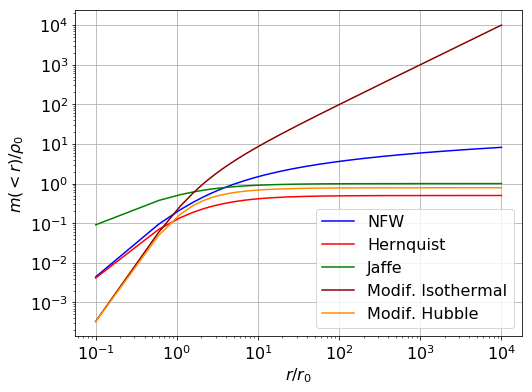

In [130]:
plt.figure(figsize=(8,6))
plt.loglog(rs, nfw, 'b-', label='NFW')
plt.loglog(rs, hernq, 'r-', label='Hernquist')
plt.loglog(rs, jaffe, 'g-', label='Jaffe')
plt.loglog(rs, isotherm, '-', color='darkred', label='Modif. Isothermal')
plt.loglog(rs, hubble, '-', color='darkorange', label='Modif. Hubble')

plt.legend(loc='best', fontsize=16)
plt.xlabel(r'$r/r_0$', fontsize=16)
plt.ylabel(r'$m(<r)/\rho_0$', fontsize=16)
plt.tick_params(labelsize=16)
plt.grid()

In [51]:
from scipy.special import betainc

$ M = \frac{4 \pi}{\alpha} \rho_0 r_0^3 B\left(\frac{3-\gamma}{\alpha}, \frac{\beta - 3}{\alpha}, 1 \right) $

In [ ]:
def mass_beta(r, alpha, beta, gamma):
    beta = betainc((3-gamma)/alpha, ()/alpha